Importo los datos de la base de datos "data1.txt", la cual se puede encontrar en este repositorio. <p>
Observo la relación entre los beneficios y la población en una gráfica.



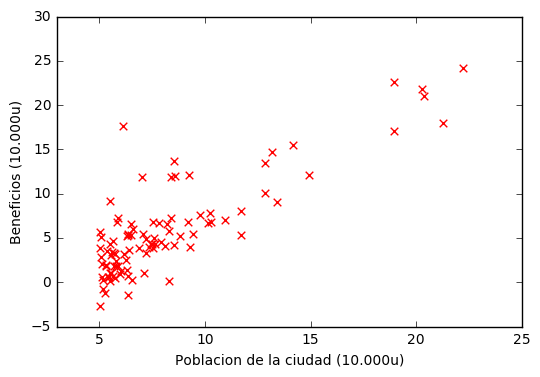

In [117]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('data1.txt', delimiter=',')
X = np.c_[np.ones(len(data)), data[:,0]]
y = np.c_[data[:,1]]

plt.scatter(X[:,1], y, s=30, c='r', marker='x')
plt.xlabel('Poblacion de la ciudad (10.000u)')
plt.ylabel('Beneficios (10.000u)')
plt.xlim(3,25)
plt.show()

Función que calcula el valor de la función de coste fijado el parámetro $\theta$.

In [113]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

Función con el algoritmo "Gradiente descendiente" dado   $X, y, \alpha, \theta$ y número de iteraciones para la regresión. <p>

Por defecto, toma el radio de aprendizaje 0.01 y el número de iteraciones 1500.

Además, en el vector J_history guardamos el valor del coste en cada iteración, ésto nos permitirá evaluar la convergencia.

In [114]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

Calculo el coste inicial para un $\theta=[0,0]$, posteriormente aplico el algoritmo del gradiente descendiente obteniendo el nuevo valor para $\theta$ y el coste mínimo.<p>
Realizo una gráfica con el valor del coste en función del número de iteraciones para asegurar la convergencia.

coste inicial 32.0727338775
theta:  [-3.63029144  1.16636235]
coste final 4.48338825659


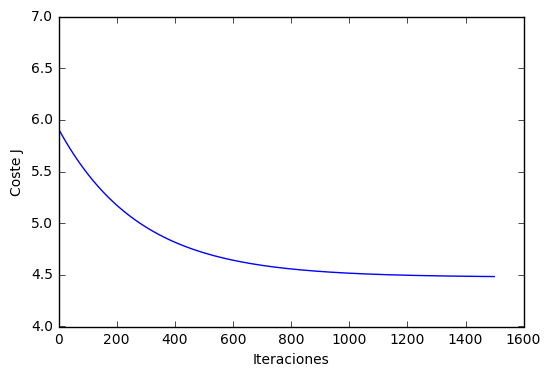

In [115]:
cost0 = computeCost(X,y)
print('coste inicial', cost0)
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())
costF = computeCost(X, y, theta)
print('coste final', costF)
plt.plot(Cost_J)
plt.ylabel('Coste J')
plt.xlabel('Iteraciones')
plt.show()


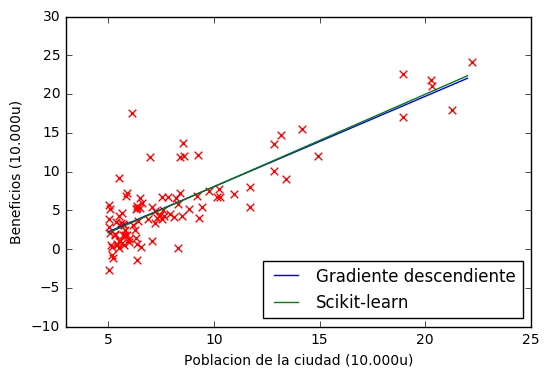

In [116]:
from sklearn.linear_model import LinearRegression

xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

plt.scatter(X[:,1], y, s=30, c='r', marker='x')
plt.plot(xx,yy, label='Gradiente descendiente')

#Comparo con scikit-learn
regr = LinearRegression(fit_intercept=False)
regr.fit(X, y.ravel())
regr.coef_[0]
plt.plot(xx, regr.coef_[0]+regr.coef_[1]*xx, label='Scikit-learn')
plt.xlim(3,25)
plt.ylim(-10,30)
plt.xlabel('Poblacion de la ciudad (10.000u)')
plt.ylabel('Beneficios (10.000u)')
plt.legend(loc=4)
plt.show()

Una vez obtenido nuestro modelo, podemos predecir los beneficios en función del número de habitantes.<p>
Suponemos que el número de habitantes de las dos ciudades en las cuales nos planteamos poner un negocio tienen como población:<p>
80000 y 180000 habitantes

In [104]:
#Predecir los beneficios de una ciudad de 80000 habitantes con el modelo que utiliza el gradiente descendiente

p1 = theta.T.dot([1,8])*10000
print('Beneficios de una ciudad de 80000  es aproximadamente  ', p1[0])

#Predecir los beneficios de una ciudad de 180000 habitantes con Scikit-learn
p2 = regr.coef_.T.dot([1,18])*10000
print('Beneficios de una ciudad de 180000 es aproximadamente ', p2)

Beneficios de una ciudad de 80000  es aproximadamente   57006.0736328
Beneficios de una ciudad de 180000 es aproximadamente  175788.247171


Ahora nos disponemos a dibujar las curvas de nivel y el contorno de la función de coste en función de los parámetros.<p>
Nuestra función de coste depende de $\theta_{0} ,\theta_{1}$ y por lo tanto es interesante apreciar gráficamente los resultados. En el caso de ser más de dos variables nuestra función de coste también sería convexa, pero la dificultad de apreciarlo visualmente aumentaría.

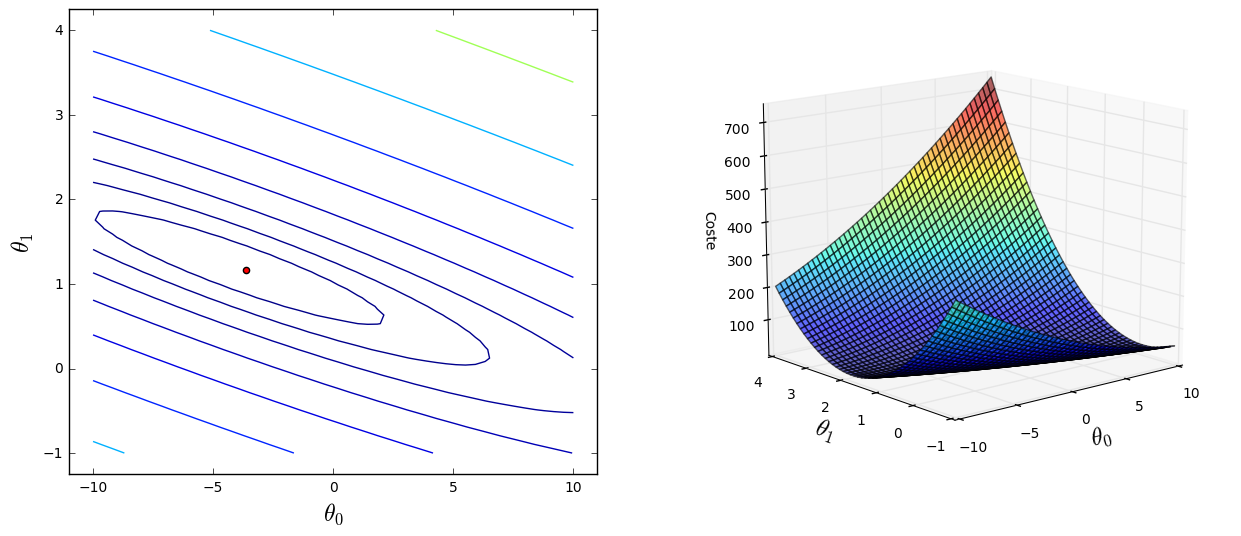

In [137]:
from mpl_toolkits.mplot3d import axes3d


B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Dibujo de la izquierda
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Dibujo de la derecha
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Coste')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)
plt.show()